# Importing the required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

1. Preparation and Cleaning of Data¶
Due to ML models and Python require numerical input I have to transform categorical variables in numerical values.

1.1. Read
1.2. The search for missings and duplicates
1.3. Evaluate statistical correlation between features. Pearson Correlation coefficient.


### Read the data :

In [320]:
train_Data = pd.read_csv("D:\\internship\\Zoho - Cluzsters ai internship\\BAnkind Dataset - MArketing\\train.csv", sep=";")
test_Data = pd.read_csv("D:\\internship\\Zoho - Cluzsters ai internship\\BAnkind Dataset - MArketing\\test.csv", sep=";")

In [321]:
train_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [322]:
test_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [323]:
train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Shape

In [324]:
print("--------------train data Shape-------------------------")
print(train_Data.shape)
print("--------------test data Shape-------------------------")
print(test_Data.shape)

--------------train data Shape-------------------------
(45211, 17)
--------------test data Shape-------------------------
(4521, 17)


In [325]:
# describe the data set
train_Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Checking Null values

In [326]:
train_Data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### Data Cleaning

In [327]:
print("============================================")
print("Entire row null values")
train_Data[(train_Data.isnull().all(axis=1))]
print("===============================================")
print("entire column null values")
train_Data.isnull().all(axis=0).sum()


Entire row null values
entire column null values


0

### There is no null values in the train set

#### Checking Unique value columns in the data set

In [328]:
singleValuedColumn = []

for i in train_Data.columns:
    if(train_Data[i].nunique == 1):
        singleValuedColumnValuedColumn.append(i)
singleValuedColumn

[]

- There is no Single valued column in the data set

### Check for Duplicate records

In [329]:
print(train_Data.duplicated(subset=None, keep='first').count)

<bound method Series.count of 0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool>


In [330]:
train_Data[train_Data.duplicated(keep=False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


- <b>There is no duplicate records in the data set</b>

In [331]:
print(train_Data.duplicated().value_counts())

False    45211
dtype: int64


In [332]:
train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- Some of the date type columns has data type as object , we will change that as well

In [333]:
CategoricalCol= train_Data.select_dtypes(include=["object"])
print(CategoricalCol.columns)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [334]:
 train_Data[CategoricalCol.columns] = train_Data[CategoricalCol.columns].astype("category")


In [335]:
train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [2]:
train_Data["job"].value_counts()

NameError: name 'train_Data' is not defined

In [3]:
train_Data["marital"].value_counts()

NameError: name 'train_Data' is not defined

In [338]:
train_Data["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [339]:
train_Data["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [340]:
train_Data["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [341]:
train_Data["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [342]:
train_Data["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [343]:
train_Data["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [344]:
train_Data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [345]:
train_Data["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [346]:
train_Data["previous"].value_counts()


0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [347]:
trainDataCorr = train_Data.corr()

<AxesSubplot:>

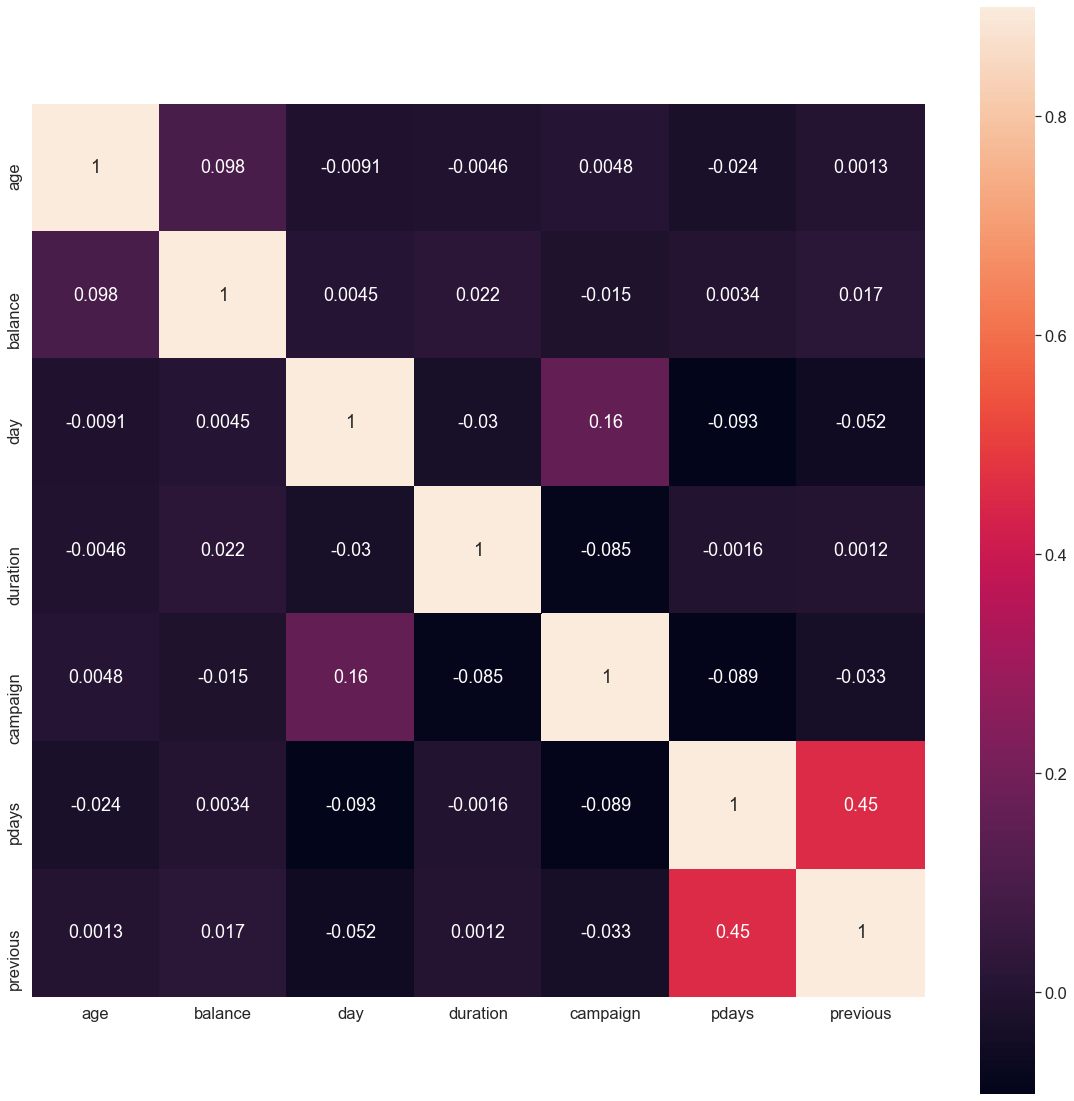

In [348]:
plt.subplots(figsize=(20,20))
sns.heatmap(trainDataCorr, vmax=0.9, square=True, annot=True)

- <b>There is no strong correlation between the indpendent variables.</b>

# EDA

### Univariate Analysis

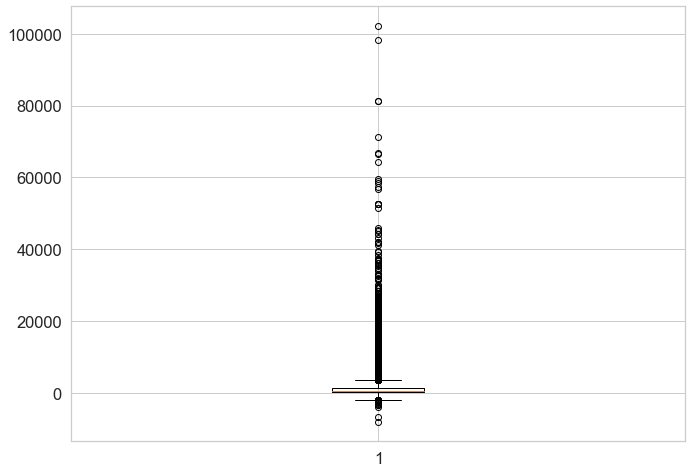

In [349]:
plt.boxplot(train_Data["balance"])
plt.show()

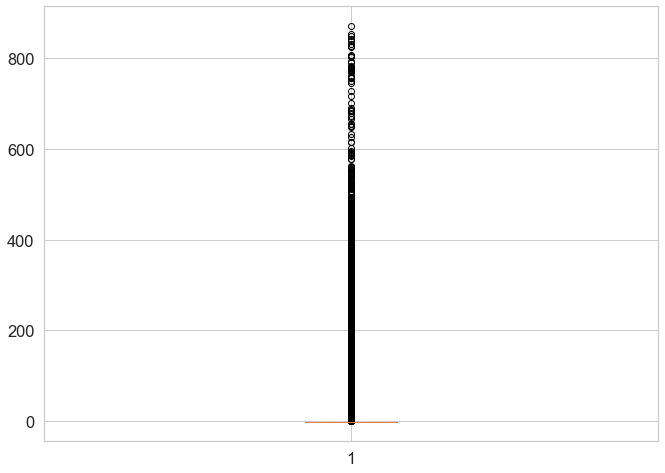

In [350]:
plt.boxplot(train_Data["pdays"])
plt.show()

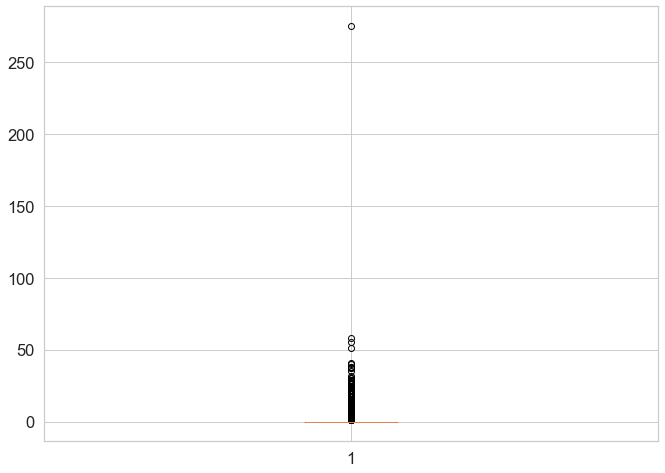

In [351]:
plt.boxplot(train_Data["previous"])
plt.show()

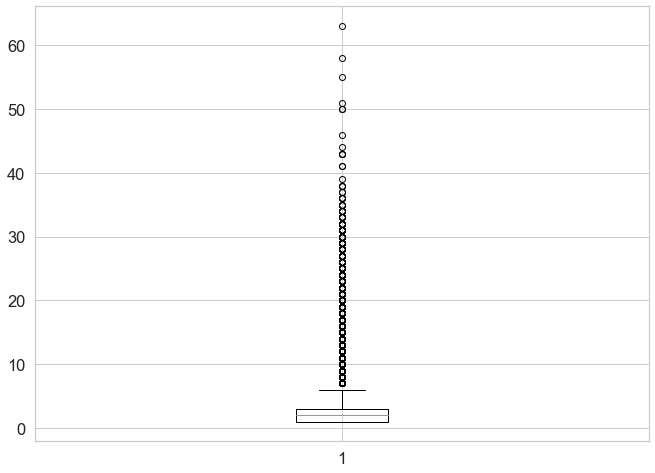

In [352]:
plt.boxplot(train_Data["campaign"])
plt.show()

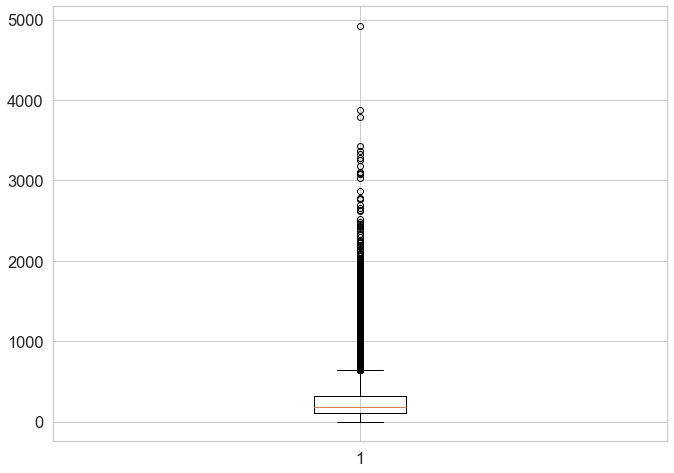

In [353]:
plt.boxplot(train_Data["duration"])
plt.show()

- it seems all the numerical varibles has some out liers

### Bivariate Analysis

##### Job and Term Deposit Subscription

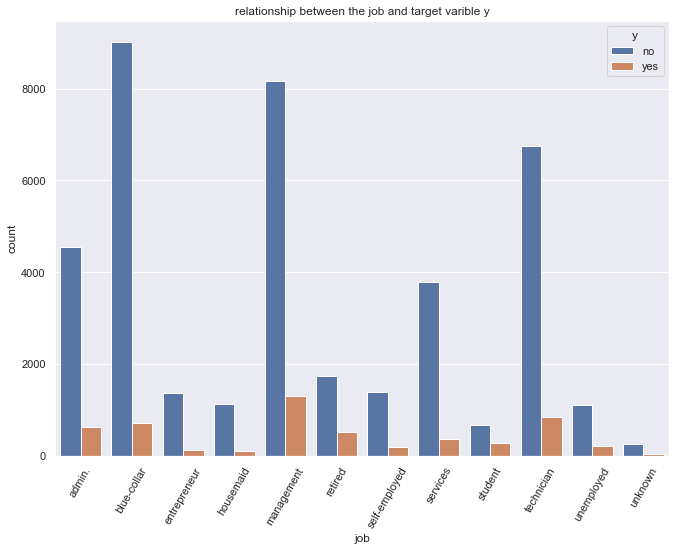

In [354]:
sns.set_theme(style="darkgrid")
job = sns.countplot(x="job", data = train_Data, hue="y")
job.tick_params(axis="x", rotation=60)
plt.title("relationship between the job and target varible y")
plt.show()

- <b>Management and technicial job holders are mostlikely willing to take term deposits compared to others</b>

##### marital and Term Deposit Subscription

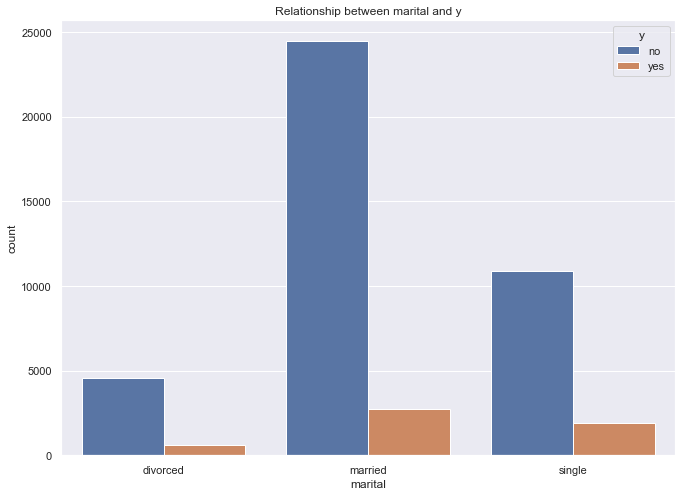

In [355]:
sns.countplot(x="marital", data= train_Data, hue="y")
plt.title("Relationship between marital and y")
plt.show()

- it seems married persons and single persons are most likelty to take term deposits than divorced.

##### education and Term Deposit Subscription

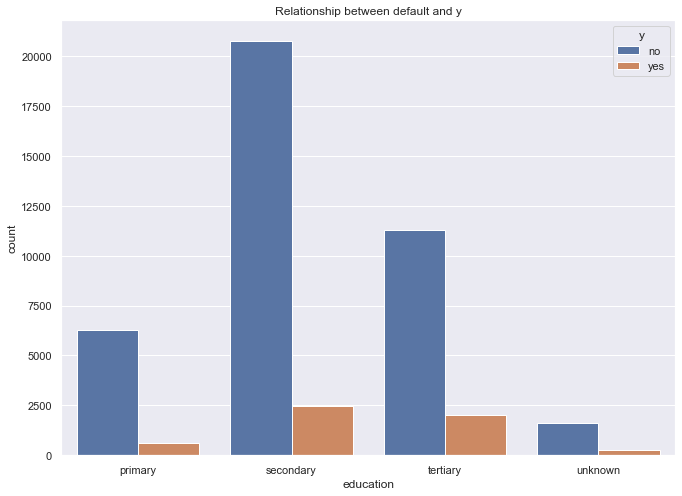

In [356]:
sns.countplot(x="education", data= train_Data, hue="y")
plt.title("Relationship between default and y")
plt.show()

- from the above figure it is clear that the persons who is having secodnary and tertiary education leves
are most likely to take term deposits

##### default and Term Deposit Subscription

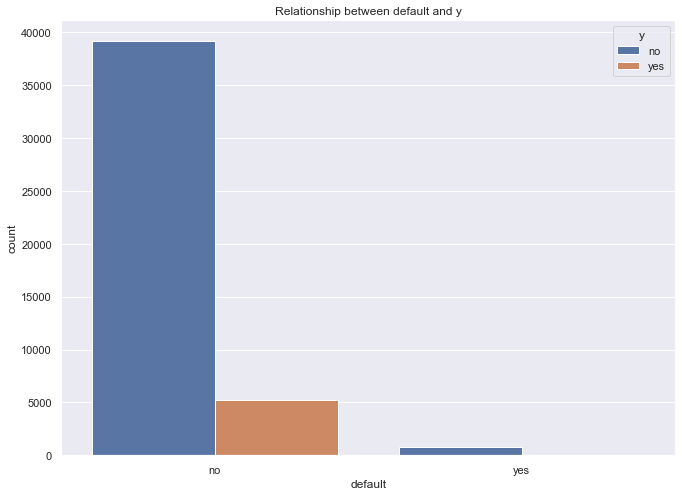

In [357]:
sns.countplot(x="default", data= train_Data, hue="y")
plt.title("Relationship between default and y")
plt.show()

- A high value of non defaulters are mostlikely to take term deposits

##### housing and Term Deposit Subscription

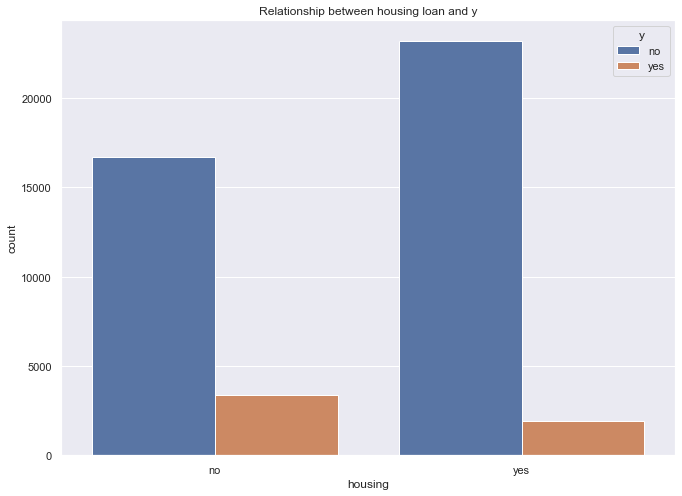

In [358]:
sns.countplot(x="housing", data= train_Data, hue="y")
plt.title("Relationship between housing loan and y")
plt.show()

- The persons who doesnot have house loasn are mostlikely to take term deposits

##### loan and Term Deposit Subscription

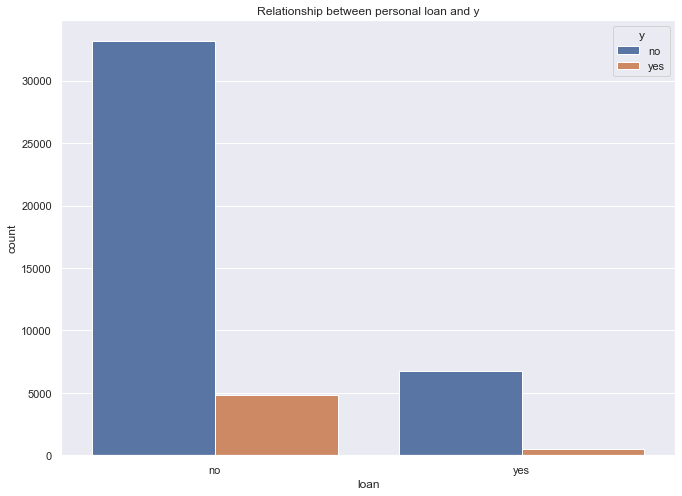

In [359]:
sns.countplot(x="loan", data= train_Data, hue="y")
plt.title("Relationship between personal loan and y")
plt.show()

- The persons who doesnot have personal loan are mostlikely to take term deposits

##### contact and Term Deposit Subscription

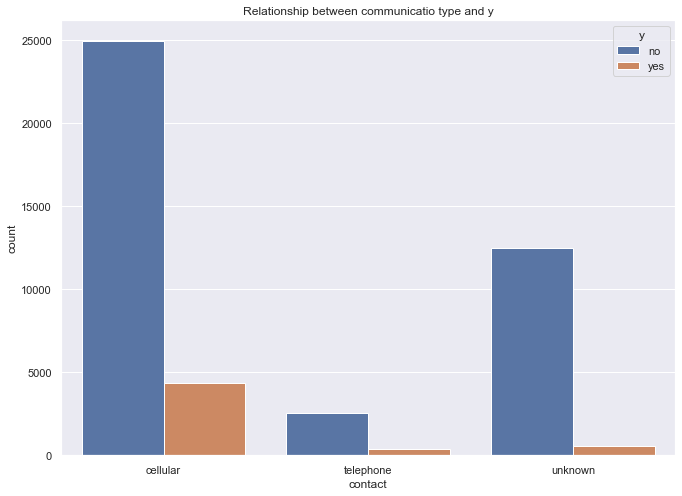

In [360]:
sns.countplot(x="contact", data= train_Data, hue="y")
plt.title("Relationship between communicatio type and y")
plt.show()

- Persons who has the communication type cellular has mostlikely to take term deposits

##### month and Term Deposit Subscription

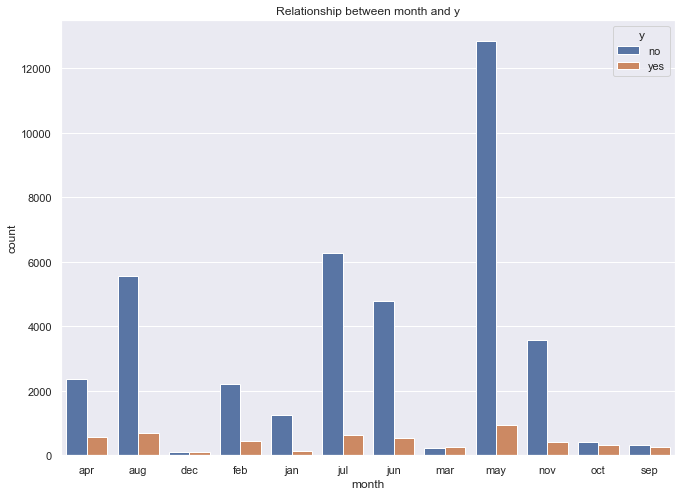

In [361]:
sns.countplot(x="month", data= train_Data, hue="y")
plt.title("Relationship between month and y")
plt.show()

- In the month May most of the term deposits were sold. and this variable is not much useful to predict out come

##### poutcome and Term Deposit Subscription

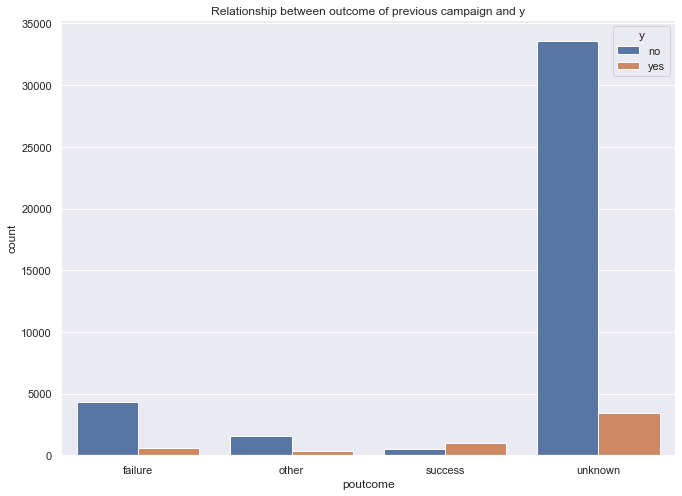

In [362]:
sns.countplot(x="poutcome", data= train_Data, hue="y")
plt.title("Relationship between outcome of previous campaign and y")
plt.show()

- This one correspond to the outcome of success of the previous marketing campaign. 
"Unknown" has most of the percentage , the people contacted did not know about the previous marketing campaign.
The effrot on this campaign could have a positive impact in the last campaign.
"success" has a very small percentage, but relevant for the analysis.

##### Term Deposit Subscription percentage

no     88.30152
yes    11.69848
Name: y, dtype: float64


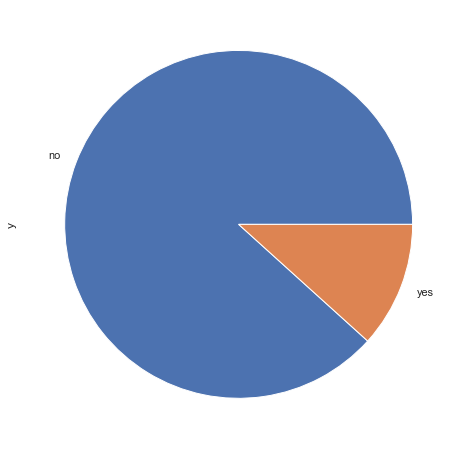

In [363]:
print((train_Data['y'].value_counts()/len(train_Data))*100)
((train_Data['y'].value_counts()/len(train_Data))*100).plot(kind="pie")
plt.show()

- only 11.69% of customers said yes for term deposits. there is a class imbalance problem.

##### age and Term Deposit Subscription

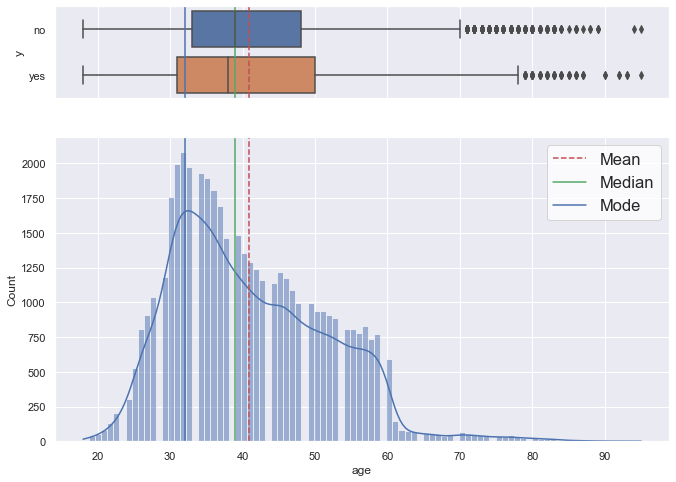

In [364]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train_Data['age'].mean()
median=train_Data['age'].median()
mode=train_Data['age'].mode().values[0]

age = sns.boxplot(data=train_Data, x="age", y="y", ax=ax_box, order = train_Data["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train_Data, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

- The population group is between 20 and 60. The box-plot shows an specific targeted age group between 30 and 50.
And by the above figure it is clearly shows that we need to target the certain segment of age of customers

##### day and Term Deposit Subscription

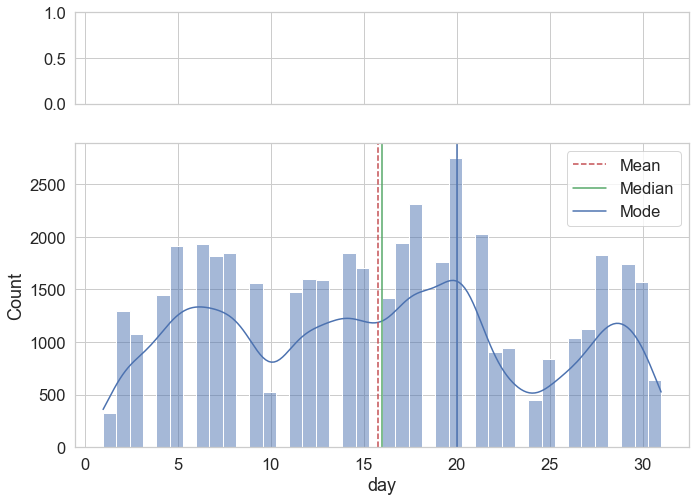

In [365]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train_Data['day'].mean()
median=train_Data['day'].median()
mode=train_Data['day'].mode().values[0]


sns.histplot(data=train_Data, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

- This feature does not contribute anything significant to the outcome to 
predict the perticular customer will take term deposit or not. So we can remove this feature

##### day and Term Deposit Subscription

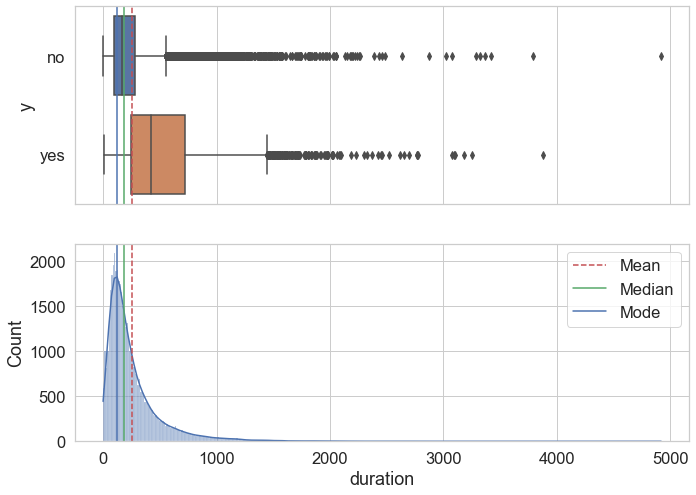

In [366]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True) # gridspec_kw= {"height_ratios": (0.3, 1)}
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train_Data['duration'].mean()
median=train_Data['duration'].median()
mode=train_Data['duration'].mode().values[0]

duration = sns.boxplot(data=train_Data, x="duration", y="y", ax=ax_box, order = train_Data["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train_Data, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

- Last contact duration has influence to predict the term deposit were sold or not. 
- if you see the box plots the persons whos communication 2 minuits has rejected the the offer.
- the long calss which are 2 to 12 mins to accept the offer.
- very few people take quite long cals tp accept/reject the offer


##### previous and Term Deposit Subscription

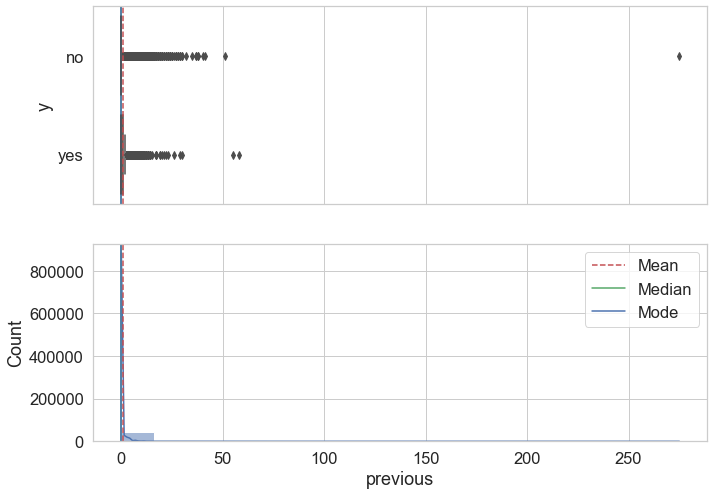

In [367]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True) # gridspec_kw= {"height_ratios": (0.3, 1)}
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train_Data['previous'].mean()
median=train_Data['previous'].median()
mode=train_Data['previous'].mode().values[0]

duration = sns.boxplot(data=train_Data, x="previous", y="y", ax=ax_box, order = train_Data["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train_Data, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

- it does not show any significant relation with the target varible. 
contacting too many to a customer si wasting of time. we will remove this columns

In [368]:
### combining the train and test data sets
train_Data["Train"] = 0
test_Data["Train"] = 1



In [369]:
train_Data.shape
train_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Train
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [370]:
test_Data.shape
test_Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Train
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1


In [371]:
TermDepositData = pd.concat([train_Data, test_Data], ignore_index=True)

In [372]:
TermDepositData.shape

(49732, 18)

In [373]:
TermDepositData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Train
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [374]:
TermDepositData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
 17  Train      49732 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.8+ MB


### imputing mode to categorical variable for the value Unknown

In [375]:
TermDepositData["job"].mode()

0    blue-collar
dtype: object

In [376]:
TermDepositData["job"].replace(["unknown"], TermDepositData["job"].mode(),inplace = True)

In [377]:
TermDepositData["job"].value_counts()

blue-collar      11004
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
Name: job, dtype: int64

In [378]:
## Education
print(TermDepositData["education"].value_counts())
print("====================================")
print(TermDepositData["education"].mode())

TermDepositData["education"].replace(["unknown"], TermDepositData["education"].mode(), inplace=True)

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64
0    secondary
dtype: object


In [379]:
print(TermDepositData["education"].value_counts())


secondary    27552
tertiary     14651
primary       7529
Name: education, dtype: int64


In [380]:
## contact
print(TermDepositData["contact"].value_counts())
print("====================================")
print(TermDepositData["contact"].mode())

TermDepositData["contact"].replace(["unknown"], TermDepositData["contact"].mode(), inplace=True)

cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64
0    cellular
dtype: object


In [381]:
print(TermDepositData["contact"].value_counts())

cellular     46525
telephone     3207
Name: contact, dtype: int64


### Dropping unnecessary features

- from the EDA we can conclude that we can drop the below features
 - month
 - previous
 - day
 - pdays

In [382]:
dropCols = ["month", "previous", "day", "pdays"]

TermDepositData.drop(columns=dropCols, inplace=True)

In [383]:
TermDepositData.shape

(49732, 14)

In [384]:
TermDepositData.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y,Train
0,58,management,married,tertiary,no,2143,yes,no,cellular,261,1,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,cellular,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,76,1,unknown,no,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,92,1,unknown,no,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,198,1,unknown,no,0


In [385]:
### labeling the DATA

TermDepositData['default'] = TermDepositData['default'].map({'yes': 1, 'no': 0})
TermDepositData['housing'] = TermDepositData['housing'].map({'yes': 1, 'no': 0})
TermDepositData['loan'] = TermDepositData['loan'].map({'yes': 1, 'no': 0})
TermDepositData['contact'] = TermDepositData['contact'].map({'telephone': 1, 'cellular': 0})
TermDepositData['y'] = TermDepositData['y'].map({'yes': 1, 'no': 0})
TermDepositData.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y,Train
0,58,management,married,tertiary,0,2143,1,0,0,261,1,unknown,0,0
1,44,technician,single,secondary,0,29,1,0,0,151,1,unknown,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,76,1,unknown,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,0,92,1,unknown,0,0
4,33,blue-collar,single,secondary,0,1,0,0,0,198,1,unknown,0,0


In [386]:
### creating dummy variables

In [387]:
TermDepositData = pd.get_dummies(TermDepositData, columns=['job', 'marital', 'education', 'poutcome'], drop_first=True)
TermDepositData.head()

,age,default,balance,housing,loan,contact,duration,campaign,y,Train,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,261,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,0,151,1,0,0,...,0,1,0,0,1,1,0,0,0,1
2,33,0,2,1,1,0,76,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,47,0,1506,1,0,0,92,1,0,0,...,0,0,0,1,0,1,0,0,0,1
4,33,0,1,0,0,0,198,1,0,0,...,0,0,0,0,1,1,0,0,0,1


0    88.317381
1    11.682619
Name: y, dtype: float64


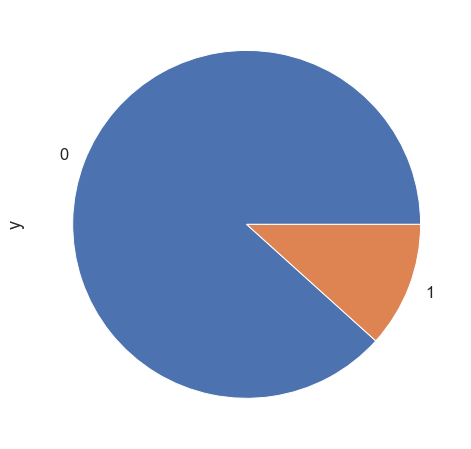

In [388]:
print((TermDepositData['y'].value_counts()/len(TermDepositData))*100)
((TermDepositData['y'].value_counts()/len(TermDepositData))*100).plot(kind="pie")
plt.show()

# Data Modeling

In [389]:
# lets create X dataset for model building.
df = TermDepositData.copy()


In [390]:
X = df.drop(['y'],axis=1)

In [391]:
X.head()

,age,default,balance,housing,loan,contact,duration,campaign,Train,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,261,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,0,151,1,0,0,...,0,1,0,0,1,1,0,0,0,1
2,33,0,2,1,1,0,76,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,47,0,1506,1,0,0,92,1,0,1,...,0,0,0,1,0,1,0,0,0,1
4,33,0,1,0,0,0,198,1,0,1,...,0,0,0,0,1,1,0,0,0,1


In [392]:
# lets create y dataset for model building.
y=df['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Train Test Split

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test: ", X_test.shape)

Dimension of X_train: (34812, 26)
Dimension of X_test:  (14920, 26)


In [394]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34812 entries, 31824 to 33003
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  34812 non-null  int64
 1   default              34812 non-null  int64
 2   balance              34812 non-null  int64
 3   housing              34812 non-null  int64
 4   loan                 34812 non-null  int64
 5   contact              34812 non-null  int64
 6   duration             34812 non-null  int64
 7   campaign             34812 non-null  int64
 8   Train                34812 non-null  int64
 9   job_blue-collar      34812 non-null  uint8
 10  job_entrepreneur     34812 non-null  uint8
 11  job_housemaid        34812 non-null  uint8
 12  job_management       34812 non-null  uint8
 13  job_retired          34812 non-null  uint8
 14  job_self-employed    34812 non-null  uint8
 15  job_services         34812 non-null  uint8
 16  job_student       

In [395]:
num_col = X_train.select_dtypes(include = ['int64']).columns.tolist()

### Feature Scaling

In [396]:
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [397]:
X_train.head()

,age,default,balance,housing,loan,contact,duration,campaign,Train,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown
31824,0.337662,0.0,0.089209,1.0,1.0,0.0,0.046564,0.000000,0.0,0,...,0,0,0,1,0,1,0,0,0,0
37526,0.194805,0.0,0.074447,1.0,0.0,0.0,0.005083,0.096774,0.0,0,...,0,1,0,0,1,1,0,0,0,1
22348,0.402597,0.0,0.073048,0.0,0.0,0.0,0.011590,0.016129,0.0,0,...,0,1,0,1,0,1,0,0,0,1
33279,0.298701,0.0,0.086621,1.0,1.0,0.0,0.076657,0.000000,0.0,1,...,0,0,0,1,0,1,0,0,0,0
40933,0.155844,0.0,0.134930,0.0,0.0,0.0,0.046157,0.000000,0.0,0,...,0,1,0,1,0,1,0,0,0,1


#### Handling Data imblance

In [398]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [399]:
print("X_train_sm Shape:", X_train_sm.shape)
print("y_train_sm Shape:", y_train_sm.shape)

X_train_sm Shape: (61400, 26)
y_train_sm Shape: (61400,)


### Model Building 

### Logistic Regression

In [400]:
import statsmodels.api as sm
#logistic regression model

lr = sm.GLM(y_train_sm, (sm.add_constant(X_train_sm)), family=sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                61400
Model:                            GLM   Df Residuals:                    61373
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26012.
Date:                Wed, 15 Sep 2021   Deviance:                       52025.
Time:                        19:22:34   Pearson chi2:                 8.33e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6974      0.084     -8.348      0.000      -0.861      -0.534
age                    -0.0666      0.106     -0.630      0.529      -0.274       0.141
default                -0.8696      0.116     -7.503      0.000      -1.097      -0.642
balance                 1.9703      0.411      4.790      0.000       1.164       2.776
housing                -1.1314      0.024    -46.784      0.000      -1.179      -1.084
loan                   -0.8911      0.037    -23.878      0.000      -0.964      -0.818
contact                 0.2091      0.047      4.496      0.000       0.118       0.300
duration               29.7458      0.277    107.289      0.000      29.202      30.289
campaign               -9.6236      0.391    -24.633      0.000     -10.389      -8.858
Train                  -0.1702      0.041     -4.191      0.000      -0.250      -0.091
job_blue-collar        -0.9276      0.042    -22.164      0.000      -1.010      -0.846
job_entrepreneur       -1.2074      0.081    -14.929      0.000      -1.366      -1.049
job_housemaid          -1.1901      0.086    -13.809      0.000      -1.359      -1.021
job_management         -0.5086      0.043    -11.756      0.000      -0.593      -0.424
job_retired             0.1115      0.060      1.852      0.064      -0.006       0.230
job_self-employed      -0.8691      0.069    -12.646      0.000      -1.004      -0.734
job_services           -0.7478      0.049    -15.271      0.000      -0.844      -0.652
job_student             0.3721      0.070      5.310      0.000       0.235       0.509
job_technician         -0.5351      0.040    -13.327      0.000      -0.614      -0.456
job_unemployed         -0.7330      0.070    -10.538      0.000      -0.869      -0.597
marital_married        -0.1323      0.035     -3.759      0.000      -0.201      -0.063
marital_single          0.1281      0.041      3.119      0.002       0.048       0.209
education_secondary     0.1403      0.038      3.726      0.000       0.066       0.214
education_tertiary      0.5023      0.045     11.122      0.000       0.414       0.591
poutcome_other          0.1399      0.055      2.539      0.011       0.032       0.248
poutcome_success        2.2854      0.062     36.653      0.000       2.163       2.408
poutcome_unknown       -0.7378      0.032    -22.811      0.000      -0.801      -0.674
=======================================================================================
"""

### Logistic Regression using Feature Selection (RFE method)

In [401]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_sm, y_train_sm)

In [402]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True])

In [403]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('age', False, 7),
 ('default', True, 1),
 ('balance', True, 1),
 ('housing', True, 1),
 ('loan', True, 1),
 ('contact', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('Train', False, 2),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', True, 1),
 ('job_management', True, 1),
 ('job_retired', False, 6),
 ('job_self-employed', True, 1),
 ('job_services', True, 1),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', True, 1),
 ('marital_married', False, 3),
 ('marital_single', True, 1),
 ('education_secondary', False, 5),
 ('education_tertiary', True, 1),
 ('poutcome_other', False, 4),
 ('poutcome_success', True, 1),
 ('poutcome_unknown', True, 1)]

In [404]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['default', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_single',
       'education_tertiary', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')


#### Assessing the model with StatsModels

In [405]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                61400
Model:                            GLM   Df Residuals:                    61379
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26039.
Date:                Wed, 15 Sep 2021   Deviance:                       52079.
Time:                        19:22:40   Pearson chi2:                 8.61e+11
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6412      0.053    -12.144      0.000      -0.745      -0.538
default               -0.8534      0.116     -7.372      0.000      -1.080      -0.627
balance                1.9152      0.408      4.691      0.000       1.115       2.715
housing               -1.1378      0.024    -48.256      0.000      -1.184      -1.092
loan                  -0.8896      0.037    -23.895      0.000      -0.963      -0.817
contact                0.2026      0.046      4.446      0.000       0.113       0.292
duration              29.7576      0.277    107.542      0.000      29.215      30.300
campaign              -9.6689      0.390    -24.796      0.000     -10.433      -8.905
job_blue-collar       -0.9963      0.037    -27.037      0.000      -1.069      -0.924
job_entrepreneur      -1.2597      0.079    -16.030      0.000      -1.414      -1.106
job_housemaid         -1.2862      0.082    -15.713      0.000      -1.447      -1.126
job_management        -0.5461      0.039    -13.966      0.000      -0.623      -0.469
job_self-employed     -0.9088      0.066    -13.734      0.000      -1.039      -0.779
job_services          -0.7680      0.046    -16.699      0.000      -0.858      -0.678
job_student            0.3517      0.067      5.262      0.000       0.221       0.483
job_technician        -0.5590      0.036    -15.410      0.000      -0.630      -0.488
job_unemployed        -0.7789      0.067    -11.643      0.000      -0.910      -0.648
marital_single         0.2508      0.024     10.261      0.000       0.203       0.299
education_tertiary     0.3830      0.031     12.360      0.000       0.322       0.444
poutcome_success       2.2501      0.060     37.274      0.000       2.132       2.368
poutcome_unknown      -0.7779      0.028    -27.586      0.000      -0.833      -0.723
======================================================================================
"""

- all column p values are zero.thus we dont need to remove any column

In [406]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.24748188, 0.02911567, 0.16120857, 0.22831368, 0.41431157,
       0.49623679, 0.94136164, 0.33000749, 0.45454919, 0.18389648])

## Creating a dataframe with the actual  flag and the predicted probabilities

In [407]:
y_train_sm_pred_final = pd.DataFrame({'Subscript':y_train_sm.values, 'Subscript_prob':y_train_sm_pred})
print(y_train_sm_pred_final.head())

y_train_sm_pred_final['Subscript_pred'] = y_train_sm_pred_final.Subscript_prob.map(lambda x: 1 if x > 0.5 else 0)
#Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0
# Viewing the prediction results
print(y_train_sm_pred_final.head())

   Subscript  Subscript_prob
0          0        0.247482
1          0        0.029116
2          0        0.161209
3          0        0.228314
4          0        0.414312
   Subscript  Subscript_prob  Subscript_pred
0          0        0.247482               0
1          0        0.029116               0
2          0        0.161209               0
3          0        0.228314               0
4          0        0.414312               0


In [408]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Subscript, y_train_sm_pred_final.Subscript_pred )
print(confusion)

[[25685  5015]
 [ 6153 24547]]


In [409]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Subscript, y_train_sm_pred_final.Subscript_pred))

The overall accuracy of the model is: 0.8181107491856677


### Metrics beyond simply accuracy

In [410]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.7995765472312704
Specificity =  0.8366449511400651
False Positive Rate =  0.16335504885993485
Precision =  0.8303565387998105
True Negative Prediction Rate =  0.8067403731390163


## Plotting the ROC Curve
#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [411]:

# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

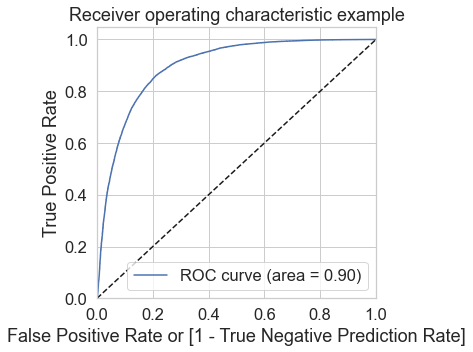

In [412]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Subscript, y_train_sm_pred_final.Subscript_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Subscript, y_train_sm_pred_final.Subscript_prob)

#### Finding Optimal Cutoff Point

In [413]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Subscript_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Subscript,Subscript_prob,Subscript_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.247482,0,1,1,1,0,0,0,0,0,0,0
1,0,0.029116,0,1,0,0,0,0,0,0,0,0,0
2,0,0.161209,0,1,1,0,0,0,0,0,0,0,0
3,0,0.228314,0,1,1,1,0,0,0,0,0,0,0
4,0,0.414312,0,1,1,1,1,1,0,0,0,0,0


In [414]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Subscript, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.640179     0.994788     0.285570
0.2          0.2  0.751612     0.971922     0.531303
0.3          0.3  0.804414     0.928404     0.680423
0.4          0.4  0.823094     0.871531     0.774658
0.5          0.5  0.818111     0.799577     0.836645
0.6          0.6  0.799316     0.714560     0.884072
0.7          0.7  0.767443     0.617166     0.917720
0.8          0.8  0.727492     0.510651     0.944332
0.9          0.9  0.666303     0.363485     0.969121


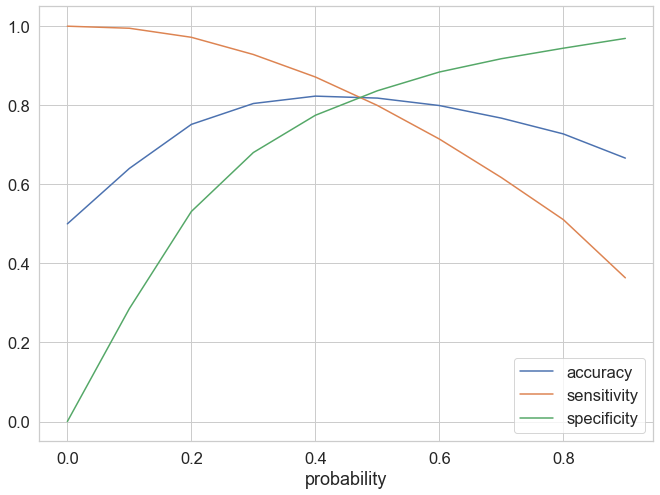

In [415]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- initially we selected the optimm point of classification as 0.5.

- From the above graph, we can see the optimum cutoff is slightly lower than 0.5 but lies higher than 0.4. So lets tweek a little more within this range

In [416]:
# Let's create columns with refined probability cutoffs 
numbers = [0.41,0.42,0.43,0.44,0.45, 0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Subscript_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Subscript,Subscript_prob,Subscript_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.44,0.45,0.46,0.47,0.48,0.49,0.51,0.52,0.53,0.54
0,0,0.247482,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.029116,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.161209,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.228314,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.414312,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [417]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.41,0.42,0.43,0.44,0.45, 0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Subscript, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.41         0.41  0.823958     0.866059     0.781857
0.42         0.42  0.824365     0.859349     0.789381
0.43         0.43  0.823893     0.852020     0.795765
0.44         0.44  0.823290     0.844625     0.801954
0.45         0.45  0.822117     0.836840     0.807394
0.46         0.46  0.821906     0.830000     0.813811
0.47         0.47  0.821482     0.822964     0.820000
0.48         0.48  0.820831     0.815212     0.826450
0.49         0.49  0.819544     0.807459     0.831629
0.50         0.50  0.818111     0.799577     0.836645
0.51         0.51  0.816433     0.791107     0.841759
0.52         0.52  0.815228     0.783029     0.847427
0.53         0.53  0.813876     0.774756     0.852997
0.54         0.54  0.812264     0.766221     0.858306


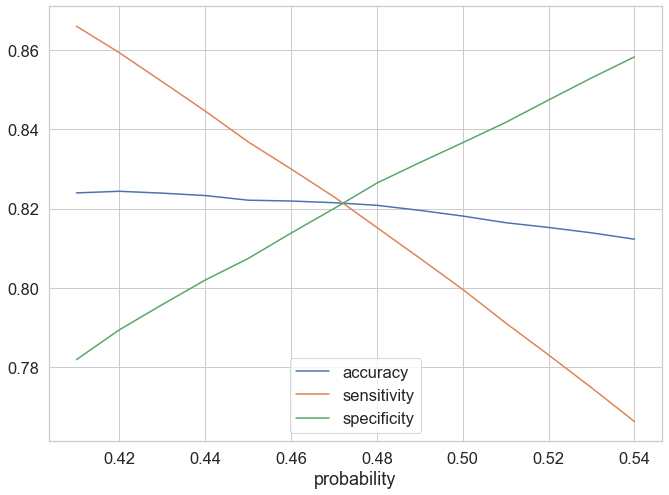

In [418]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

##### From the above graph we can conclude, 
the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.47

In [419]:
#### From the curve above, 0.47 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_Subscript_pred'] = y_train_sm_pred_final.Subscript_prob.map( lambda x: 1 if x > 0.47 else 0)

y_train_sm_pred_final.head(10)

,Subscript,Subscript_prob,Subscript_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.45,0.46,0.47,0.48,0.49,0.51,0.52,0.53,0.54,final_Subscript_pred
0,0,0.247482,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.029116,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.161209,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.228314,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.414312,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0.496237,0,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,0,0,1
6,0,0.941362,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,0,0.330007,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0.454549,0,1,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0.183896,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [420]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Subscript, y_train_sm_pred_final.final_Subscript_pred))

The overall accuracy of the model now is: 0.8214820846905537


In [421]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Subscript, y_train_sm_pred_final.final_Subscript_pred )
print(confusion2)

[[25174  5526]
 [ 5435 25265]]


In [422]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))
print("Recall = ", TP2 / float(TP2 + FN2))
# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8229641693811075
Specificity =  0.82
False Positive Rate =  0.18
Precision =  0.8205319736286577
Recall =  0.8229641693811075
True Negative Prediction Rate =  0.8224378450782449


### Precision and recall tradeoff

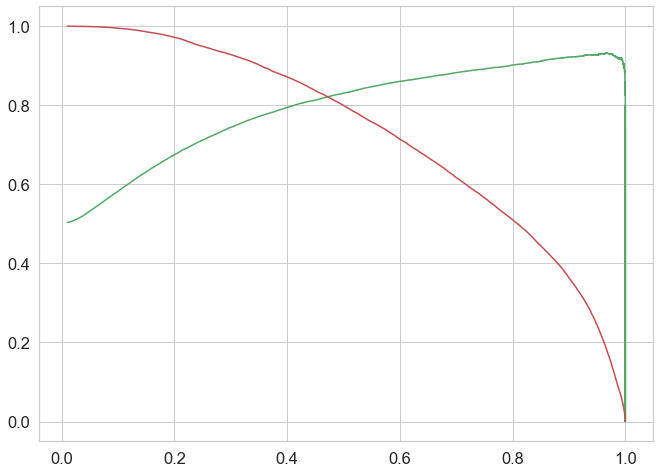

In [423]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Subscript, y_train_sm_pred_final.Subscript_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

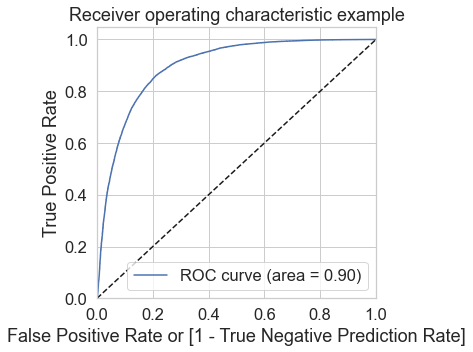

In [424]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Subscript, y_train_sm_pred_final.Subscript_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Subscript, y_train_sm_pred_final.Subscript_prob)

#### Making predictions on the test set
Transforming and feature selection for test data

In [425]:
X_test[rfe_columns].head()

,default,balance,housing,loan,contact,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_single,education_tertiary,poutcome_success,poutcome_unknown
8165,0,147,1,0,0,102,2,1,0,0,0,0,0,0,0,0,1,0,0,1
21927,0,20,0,0,0,210,2,0,0,0,0,0,0,0,1,0,0,0,0,1
9756,0,5011,1,0,0,311,2,0,0,1,0,0,0,0,0,0,0,1,0,1
14416,0,0,0,0,1,81,2,0,0,0,0,0,0,0,1,0,0,0,0,1
35457,0,122,1,0,1,325,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [426]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,age,default,balance,housing,loan,contact,duration,campaign,Train,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown
8165,0.077922,0.0,0.074138,1.0,0.0,0.0,0.020740,0.016129,0.0,1,...,0,0,0,0,1,0,0,0,0,1
21927,0.181818,0.0,0.072985,0.0,0.0,0.0,0.042700,0.016129,0.0,0,...,0,1,0,1,0,1,0,0,0,1
9756,0.207792,0.0,0.118298,1.0,0.0,0.0,0.063237,0.016129,0.0,0,...,0,0,0,1,0,0,1,0,0,1
14416,0.376623,0.0,0.072803,0.0,0.0,1.0,0.016470,0.016129,0.0,0,...,0,1,0,1,0,1,0,0,0,1
35457,0.389610,0.0,0.073911,1.0,0.0,1.0,0.066084,0.000000,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [427]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,default,balance,housing,loan,contact,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_single,education_tertiary,poutcome_success,poutcome_unknown
8165,0.0,0.074138,1.0,0.0,0.0,0.020740,0.016129,1,0,0,0,0,0,0,0,0,1,0,0,1
21927,0.0,0.072985,0.0,0.0,0.0,0.042700,0.016129,0,0,0,0,0,0,0,1,0,0,0,0,1
9756,0.0,0.118298,1.0,0.0,0.0,0.063237,0.016129,0,0,1,0,0,0,0,0,0,0,1,0,1
14416,0.0,0.072803,0.0,0.0,1.0,0.016470,0.016129,0,0,0,0,0,0,0,1,0,0,0,0,1
35457,0.0,0.073911,1.0,0.0,1.0,0.066084,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,1


In [428]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [429]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 8165     0.063022
21927    0.326597
9756     0.181282
14416    0.213850
35457    0.311677
30863    0.399886
3760     0.300196
25218    0.063156
12365    0.012718
461      0.120850
dtype: float64


In [430]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
8165,0.063022
21927,0.326597
9756,0.181282
14416,0.213850
35457,0.311677


In [431]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,y
8165,0
21927,0
9756,0
14416,0
35457,0


In [432]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,y,Conv_prob
8165,0,0.063022
21927,0,0.326597
9756,0,0.181282
14416,0,0.213850
35457,0,0.311677


In [433]:
y_pred_final['test_Subscript_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.47 else 0)
y_pred_final.head()

,y,Conv_prob,test_Subscript_pred
8165,0,0.063022,0
21927,0,0.326597,0
9756,0,0.181282,0
14416,0,0.213850,0
35457,0,0.311677,0


In [434]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.y, y_pred_final.test_Subscript_pred)

0.8170241286863271

In [435]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.y, y_pred_final.test_Subscript_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[10849  2373]
 [  357  1341]]


In [436]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

metricLR=[]
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))
metricLR.append(TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ", TN3 / float(TN3+FP3))
metricLR.append(TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))
metricLR.append(FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))
metricLR.append(TP3 / float(TP3+FP3))

print ("Recall = ", TP3 / float(TP3 + FN3))
metricLR.append(TP3 / float(TP3 + FN3))
# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))
metricLR.append(TN3 / float(TN3+FN3))

Sensitivity =  0.7897526501766784
Specificity =  0.8205263954016034
False Positive Rate =  0.17947360459839662
Precision =  0.36106623586429726
Recall =  0.7897526501766784
True Negative Prediction Rate =  0.9681420667499554


In [437]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.y, y_pred_final.test_Subscript_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of term deposit subscription by a customer\n") 

The accuracy of the predicted model is:  82.0 %
The sensitivity of the predicted model is:  79.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of term deposit subscription by a customer



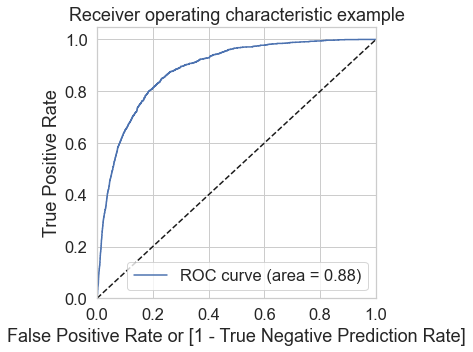

In [438]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.y,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.y,y_pred_final.Conv_prob)

- <b>The AUC score for train dataset is 0.90 and the test dataset is 0.88.
- This model can be considered as a good model.</b>

In [439]:

# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [440]:
# fit model
model.fit(X_train_SM, y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [441]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8973305234007787
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2'}


In [442]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [443]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [444]:
# coefficients
coefficients = logistic_model.coef_.reshape((21, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train_SM.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [445]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,const,default,balance,housing,loan,contact,duration,campaign,job_blue-collar,...,job_management,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_single,education_tertiary,poutcome_success,poutcome_unknown
0,2.451016,0.0,-0.135504,0.089019,-0.618674,-0.324891,0.076811,2.542438,-0.453156,-0.500229,...,-0.278708,-0.217102,-0.270438,0.059499,-0.227114,-0.154537,0.124847,0.217841,0.697452,-0.378403


### Business insights

- Need to concentrate on the Average yearly balance. The customers who has more average yearly balance is more tend to take term deposits
- Cellular contacts more interested to take termdeposits
- The customers who is having loans are less likely.
- The customers whos call duration is more will take the term deposits
- Persons job type is more impacted the selling term deposits
- Single persons more tend to take term deposits
- Customers education is also important to explain the uses of term deposits and commits them to subscribe
- previous campaign outcome - succes is also place a widal role in selling the term deposits


## Metrics
- Sensitivity Test data is 79%
- Sensitivity of train data is 82%